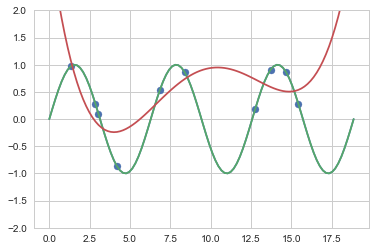

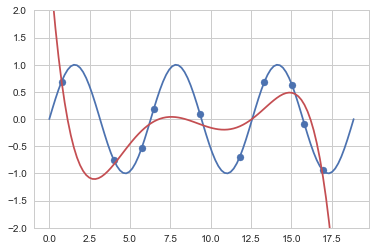

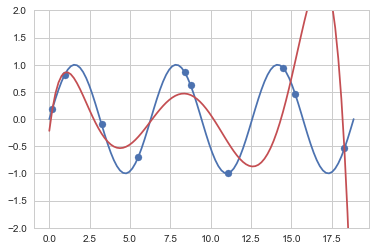

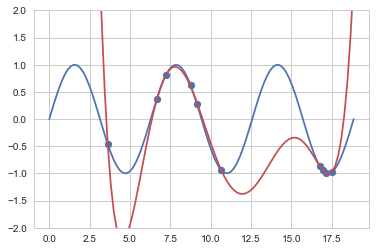

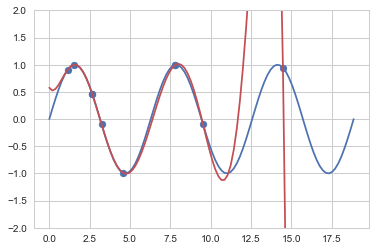

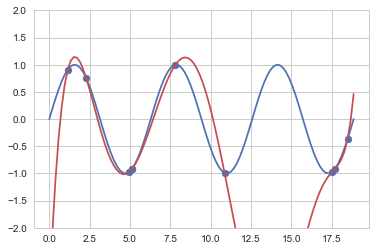

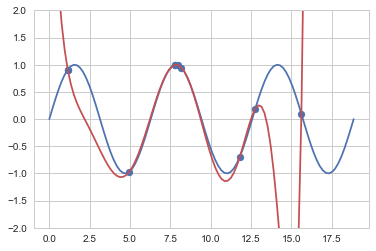

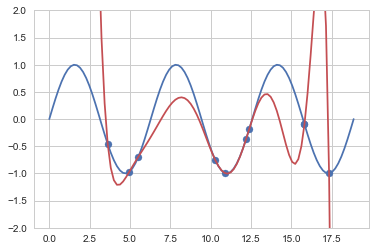

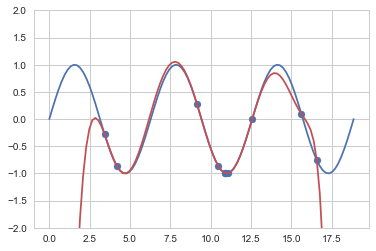

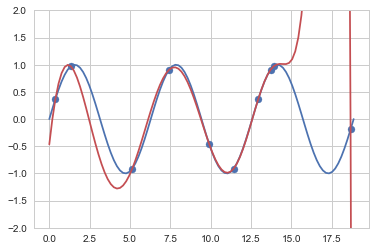

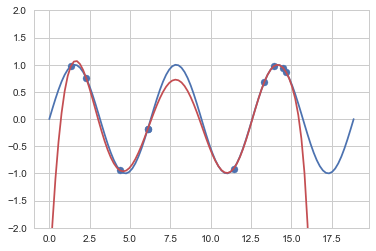

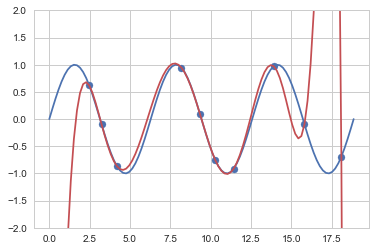

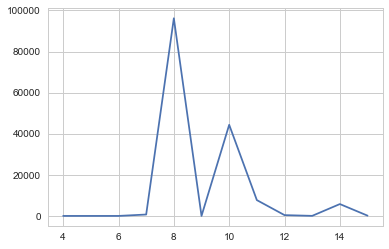

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 100
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

plt.plot(X, Y)

def make_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

def fit_and_display(X, Y, sample, deg):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)
    
    X_poly = make_poly(X, deg)
    Yhat = X_poly.dot(w)
    
    plt.scatter(Xtrain, Ytrain)
    plt.plot(X, Y)
    plt.plot(X, Yhat, c='r')
    plt.ylim((-2, 2))
    plt.show()
    return get_mse(Y, Yhat)
    
mses = []
for deg in [4, 5, 6, 7, 8, 9, 10 , 11, 12, 13, 14, 15]:
    mse = fit_and_display(X, Y, 10, deg)
    mses.append(mse)
    
def get_mse(Y, Yhat):
    return (Y-Yhat).T.dot(Y-Yhat) / len(Y)

plt.plot([4, 5, 6, 7, 8, 9, 10 , 11, 12, 13, 14, 15], mses)
    